In [1]:
import numpy as np
from skimage import io
import PIL
import matplotlib.pyplot as plt

In [2]:
#cargamos la imagen 
image = io.imread("los-unown-desbloquean-medallas-en-pokemon-go_fzez.jpg")
alto=image.shape[0]
ancho=image.shape[1]
image.shape

(504, 896, 3)

In [26]:
#recortamos de forma uniforme teniendo en cuenta que hay 7 columnas y 3 filas
window_alto=alto//3
window_ancho=ancho//7

row_cuts=[window_alto*i for i in range(3)]
col_cuts=[window_ancho*i for i in range(7)]


In [27]:
print(col_cuts,row_cuts)

[0, 128, 256, 384, 512, 640, 768] [0, 168, 336]


In [61]:
imagenes=[]
for i in col_cuts:
    for j in row_cuts:
        aux=image[j:j+window_alto,i:i+window_ancho][:,:,0]
        #las imagenes son la mayoria zeros, la imagen esta en 3 canales y esta invertido 
        aux=np.where(aux<200,1,0)
        imagenes.append(aux)

In [62]:
#los guardamos talcual
np.save("unowns_original_separados_blackwhite",np.array(imagenes))

In [54]:
len(imagenes)

21

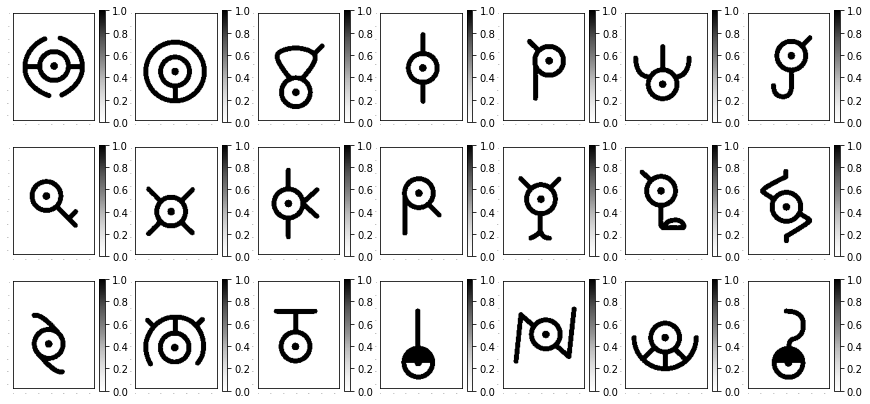

In [63]:
plt.figure(figsize=(15,7))
for i in range(21):
    plt.subplot(3,7,i+1)
    plt.imshow(imagenes[i],cmap="Greys")
    #plt.colorbar()
    plt.tick_params(labelsize=0,length=0,width=0)

In [64]:
#ya tenemos un conjunto ahora queremos darle data augmentation un poquito a las flips, rotaciones
#un poquito de jitter y y lo tendriamos 
#esto lo haremos con tensorflow en COLAB
